In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.datasets import load_iris
import sklearn.metrics as metrics
import warnings
warnings.simplefilter('ignore')

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# 특성데이터
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# 라벨 - 종 분류 
# 'setosa', 'versicolor', 'virginica'
# 0 / 1 / 2

iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# 꽃잎 sepal 
# 꽃받침 petal

iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
specis,0.782561,-0.426658,0.949035,0.956547,1.000000


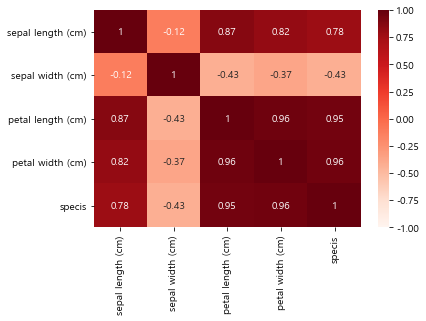

In [9]:
sns.heatmap( iris_df.corr(), annot=True, cmap='Reds', vmin=-1, vmax=1) # 상관관계는 vmin=-1, vmax=1 지정해 주기!!
plt.show()

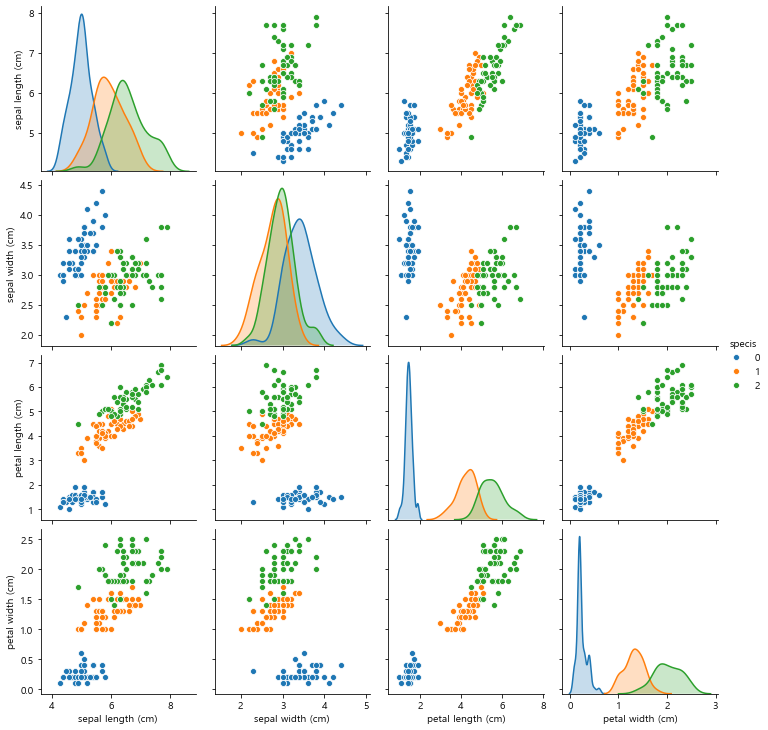

In [10]:
sns.pairplot(data=iris_df, hue='specis') # hue='specis' 분류에 따라 색깔별로 나옴!
plt.show()

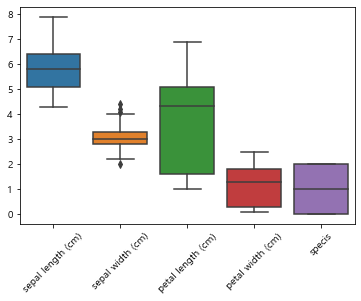

In [11]:
plt.xticks(rotation=45)
sns.boxplot(data=iris_df)
plt.show()

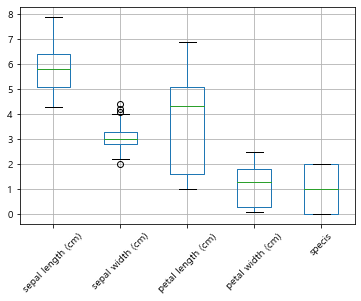

In [12]:
iris_df.boxplot(rot=45)
plt.show()

In [13]:
x_data = iris_df.iloc[:, :-1]
y_data = iris_df.iloc[:, -1]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

### 모델 사용
### # LogisticRegression(multi_class='multinomial')

In [15]:
model_logi = LogisticRegression(multi_class='multinomial')
model_logi.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [16]:
# 정확도

model_logi.score(x_test, y_test)

0.9666666666666667

In [17]:
model_logi.predict(x_test)

array([0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 1, 2])

In [18]:
y_test

44     0
105    2
66     1
28     0
0      0
100    2
98     1
10     0
14     0
12     0
47     0
67     1
81     1
65     1
60     1
102    2
76     1
117    2
140    2
107    2
55     1
13     0
8      0
83     1
127    2
27     0
110    2
125    2
92     1
113    2
Name: specis, dtype: int32

In [19]:
model_logi.predict_proba(x_test)

array([[9.53294015e-01, 4.67056062e-02, 3.78982985e-07],
       [1.07645536e-07, 5.58039968e-03, 9.94419493e-01],
       [1.15754597e-02, 7.50691712e-01, 2.37732828e-01],
       [9.74056753e-01, 2.59432150e-02, 3.22637926e-08],
       [9.78739125e-01, 2.12608482e-02, 2.70538186e-08],
       [1.73234681e-06, 5.18628837e-03, 9.94811979e-01],
       [2.98684141e-01, 6.99610368e-01, 1.70549065e-03],
       [9.71209601e-01, 2.87903627e-02, 3.60721062e-08],
       [9.83426055e-01, 1.65739398e-02, 5.60692314e-09],
       [9.74127949e-01, 2.58720109e-02, 3.97770654e-08],
       [9.82342836e-01, 1.76571265e-02, 3.70161433e-08],
       [2.29537996e-02, 9.52138668e-01, 2.49075327e-02],
       [5.33759777e-02, 9.35815025e-01, 1.08089973e-02],
       [6.62321359e-03, 9.20550061e-01, 7.28267258e-02],
       [8.67946974e-02, 9.03182672e-01, 1.00226302e-02],
       [4.36559231e-06, 2.98253193e-02, 9.70170315e-01],
       [1.56068820e-03, 7.82739492e-01, 2.15699820e-01],
       [1.59415487e-07, 5.04053

In [20]:
y_predict = model_logi.predict(x_test)

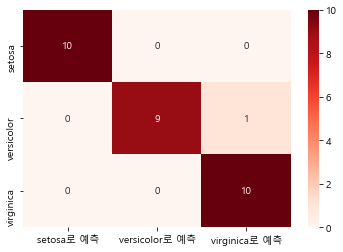

In [21]:
cm = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap( cm, annot=True, cmap='Reds',
             xticklabels=['setosa로 예측', 'versicolor로 예측', 'virginica로 예측'],
             yticklabels=iris['target_names'] )
plt.show() 

### # 다중인 경우  average='macro'을 줘서 F1 score을 구하기!!

In [22]:
# 다중인 경우  average='macro'을 줘서 F1 score을 구하기!!

metrics.f1_score(y_test, y_predict, average='macro') 

0.9665831244778613

## 다중분류에서 w의 개수 : feature의 개수 * 분류의 개수

- ws1*x1 + ws1*x2 + ws1*x3 + bs
- wvs1*x1 + wvs1*x2 + ws1*x3 + bvs
- wvc1*x1 + ws1*x2 + ws1*x3 + bs

In [23]:
# 특성데이터4개 * 분류3개 = 12
# 기울기

model_logi.coef_

array([[-0.43075276,  0.85175204, -2.43228185, -0.99582945],
       [ 0.57039507, -0.18548424, -0.25229012, -0.82326085],
       [-0.13964231, -0.6662678 ,  2.68457197,  1.8190903 ]])

In [24]:
# 분류 3개에 대한 절편

model_logi.intercept_

array([  9.89784921,   1.50642227, -11.40427149])

### # matmul을 통해 알아보자!

In [25]:
x_test.shape

(30, 4)

In [26]:
# (4, 3)

aa = model_logi.coef_.T

In [27]:
# model_logi.predict_proba

np.matmul(x_test.values, aa) + model_logi.intercept_

array([[  5.9180006 ,   2.90194143,  -8.81994202],
       [ -8.96491772,   1.89100949,   7.07390823],
       [ -2.39812263,   1.77398511,   0.62413752],
       [  6.94953132,   3.32397186, -10.27350318],
       [  7.0777818 ,   3.24838393, -10.32616573],
       [ -7.08837618,   0.91592036,   6.17245582],
       [  1.43813229,   2.28926922,  -3.7274015 ],
       [  6.87567819,   3.35717659, -10.23285478],
       [  7.68858726,   3.60537638, -11.29396364],
       [  6.88071455,   3.25233362, -10.13304817],
       [  7.03763257,   3.01883167, -10.05646424],
       [ -1.26897133,   2.45625587,  -1.18728454],
       [ -0.42235838,   2.44169867,  -2.0193403 ],
       [ -2.44396434,   2.49042636,  -0.04646202],
       [ -0.06122644,   2.28115286,  -2.21992642],
       [ -7.04694404,   1.78241504,   5.264529  ],
       [ -3.71547797,   2.50219509,   1.21328288],
       [ -8.66940249,   1.6921065 ,   6.97729598],
       [ -6.35853201,   1.36441737,   4.99411464],
       [ -7.8924337 ,   2.06110

In [28]:
model_logi.predict_proba(x_test)

array([[9.53294015e-01, 4.67056062e-02, 3.78982985e-07],
       [1.07645536e-07, 5.58039968e-03, 9.94419493e-01],
       [1.15754597e-02, 7.50691712e-01, 2.37732828e-01],
       [9.74056753e-01, 2.59432150e-02, 3.22637926e-08],
       [9.78739125e-01, 2.12608482e-02, 2.70538186e-08],
       [1.73234681e-06, 5.18628837e-03, 9.94811979e-01],
       [2.98684141e-01, 6.99610368e-01, 1.70549065e-03],
       [9.71209601e-01, 2.87903627e-02, 3.60721062e-08],
       [9.83426055e-01, 1.65739398e-02, 5.60692314e-09],
       [9.74127949e-01, 2.58720109e-02, 3.97770654e-08],
       [9.82342836e-01, 1.76571265e-02, 3.70161433e-08],
       [2.29537996e-02, 9.52138668e-01, 2.49075327e-02],
       [5.33759777e-02, 9.35815025e-01, 1.08089973e-02],
       [6.62321359e-03, 9.20550061e-01, 7.28267258e-02],
       [8.67946974e-02, 9.03182672e-01, 1.00226302e-02],
       [4.36559231e-06, 2.98253193e-02, 9.70170315e-01],
       [1.56068820e-03, 7.82739492e-01, 2.15699820e-01],
       [1.59415487e-07, 5.04053

In [29]:
# 확률이 가장 높은 값에 대한 argmax를 출력
# softmax를 통과시키고 3개의 확률 중에서 가장 높은 확률에 대한 분류를 선택!!

model_logi.predict_proba(x_test).argmax(axis=1)

array([0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 1, 2], dtype=int64)

In [30]:
model_logi.predict_proba([[5.2, 3.5, 1.5, 0.2]]).argmax(axis=1)

array([0], dtype=int64)

In [31]:
model_logi.predict([[5.2, 3.5, 1.5, 0.2]])

array([0])